# importing all the necessary modules



In [147]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Loading mnist dataset into separate train and test variables

In [148]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# printing out lengths of training and test data

In [149]:
print (len(X_train),len(Y_train))
print (len(X_test),len(Y_test))

60000 60000
10000 10000


# Printing out dimensions of X_train(Images pixel array)

In [150]:
X_train.shape
#X_train[0]



(60000, 28, 28)

# Normalising X_train and X_test

In [151]:
X_train = X_train/255
X_test = X_test/255

In [152]:
X_train[0]
print(Y_train[0])

5


# Flattening out X_train and X_test to reduce the dimensions and printing out new dimensions

In [153]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [154]:
X_train_flattened.shape

(60000, 784)

In [155]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [156]:
X_test_flattened.shape

(10000, 784)

# Building model and fitting the data

In [157]:
model= keras.Sequential([

keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
keras.layers.Dense(100,activation = 'relu'),    
keras.layers.Dense(10,activation = 'sigmoid')
    
    
                   
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [158]:
%%time
model.fit(X_train_flattened,Y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 51s 3ms/step - loss: 0.4299 - accuracy: 0.8739
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1081 - accuracy: 0.9666
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9765
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0557 - accuracy: 0.9828
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9876
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9887
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0295 - accuracy: 0.9904
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0247 - accuracy: 0.9917
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0195 - accuracy: 0.9929
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.01

Evaluating the model

In [159]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 5s 2ms/step - loss: 0.1119 - accuracy: 0.9767


[0.11194189637899399, 0.9767000079154968]

# Predicting digits for test values 

In [182]:
y_predicted =model.predict(X_test_flattened)
y_predicted[1]

array([2.0344645e-02, 1.9974113e-03, 1.0000000e+00, 9.5782584e-01,
       4.8076170e-12, 1.8508733e-06, 4.7961729e-10, 2.8252565e-11,
       9.5211452e-01, 2.2926914e-09], dtype=float32)

In [190]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [191]:
print(Y_test[:5])

[7 2 1 0 4]


# Visulaising the number of images predicted correctly using confusion matrix

In [143]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    0,    1,    2,    0,    1,    0,    3,    1],
       [   0, 1130,    0,    0,    0,    0,    2,    0,    2,    1],
       [   7,    5, 1005,    2,    1,    0,    1,    6,    5,    0],
       [   0,    0,    6,  991,    0,    1,    0,    5,    6,    1],
       [   0,    0,    3,    0,  956,    1,    4,    4,    1,   13],
       [   3,    0,    0,   13,    1,  860,    5,    2,    5,    3],
       [   4,    1,    2,    1,    5,   11,  931,    0,    3,    0],
       [   0,    2,   11,    5,    1,    1,    0,  997,    3,    8],
       [   1,    0,    5,    4,    2,    4,    0,    2,  951,    5],
       [   2,    2,    0,    7,    7,    2,    0,    4,    3,  982]])>

Text(69.0, 0.5, 'Truth')

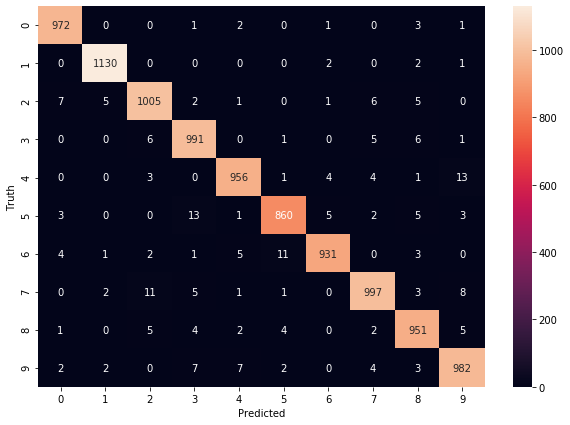

In [144]:
import seaborn as sn
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Loading handwritten images

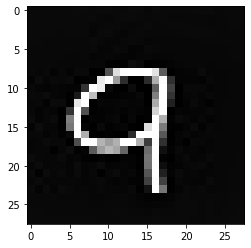

In [186]:
img = image.load_img("./9.jpg")
img_pixel = cv2.imread("./9.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_pixel, cmap='gray')

# Reshaping the pixel array of the handwrirren image

In [95]:
#print(X_test[0])
#print(img_pixel_flattened[0])

In [187]:
print(img_pixel.shape)
print(X_test_flattened[0].shape)

(28, 28)
(784,)


In [188]:
img_pixel_flattened = img_pixel.reshape(1,28*28)
print(img_pixel_flattened.shape)
img_pixel_flattened = img_pixel_flattened/255
print(img_pixel_flattened[0].shape)
print(img_pixel_flattened[0])


(1, 784)
(784,)
[0.03529412 0.03529412 0.03529412 0.03529412 0.03529412 0.03529412
 0.03921569 0.03921569 0.03529412 0.03921569 0.03921569 0.03529412
 0.03529412 0.04313725 0.03921569 0.02745098 0.03921569 0.03529412
 0.03529412 0.03529412 0.03529412 0.03529412 0.03921569 0.03921569
 0.03137255 0.03529412 0.03529412 0.03529412 0.03529412 0.03529412
 0.03529412 0.03529412 0.03529412 0.03529412 0.03529412 0.03529412
 0.03921569 0.03137255 0.02745098 0.03529412 0.03921569 0.03921569
 0.03529412 0.03137255 0.03529412 0.03529412 0.03137255 0.03137255
 0.03137255 0.03137255 0.03137255 0.02745098 0.03137255 0.03137255
 0.03529412 0.03529412 0.03529412 0.03529412 0.03529412 0.03529412
 0.03529412 0.03529412 0.03529412 0.03529412 0.02745098 0.03137255
 0.03529412 0.03529412 0.03137255 0.02745098 0.03137255 0.03921569
 0.03137255 0.03137255 0.03529412 0.03529412 0.03529412 0.03137255
 0.03137255 0.03137255 0.03137255 0.03137255 0.03529412 0.03529412
 0.03529412 0.03529412 0.03529412 0.03529412 0

# Predicting the digit for the handwritten image

In [189]:
digit_predicted =model.predict(img_pixel_flattened)
np.argmax(digit_predicted[0])

9